In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [187]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")

In [188]:
df

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [189]:
df.shape

(698, 11)

In [190]:
df.columns=["ID","Clump_Thickness","Cell_Size","Cell_Shape","Marginal_Adhesion","Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"]

In [191]:
df

,ID,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [192]:
df.isnull().sum()

ID                      0
Clump_Thickness         0
Cell_Size               0
Cell_Shape              0
Marginal_Adhesion       0
Epithelial_Cell_Size    0
Bare_Nuclei             0
Bland_Chromatin         0
Normal_Nucleoli         0
Mitoses                 0
Class                   0
dtype: int64

In [193]:
df.duplicated().sum()

8

In [194]:
df.drop_duplicates()

,ID,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


2 for Benign 4 for Malignant

In [195]:
columns_list=df.columns
print(columns_list)

Index(['ID', 'Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion',
       'Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


In [196]:
df.dtypes

ID                       int64
Clump_Thickness          int64
Cell_Size                int64
Cell_Shape               int64
Marginal_Adhesion        int64
Epithelial_Cell_Size     int64
Bare_Nuclei             object
Bland_Chromatin          int64
Normal_Nucleoli          int64
Mitoses                  int64
Class                    int64
dtype: object

In [197]:
df['Bare_Nuclei'].isnull().sum()

0

In [198]:
df.fillna(0)

,ID,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [199]:
df['Bare_Nuclei'].value_counts()

1     401
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [200]:
df['Bare_Nuclei'].replace('?','1',inplace = True)

In [201]:
df['Bare_Nuclei'].value_counts()

1     417
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [202]:
df.describe()

,ID,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [203]:
df.corr()

,ID,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
ID,1.000000,-0.055276,-0.041735,-0.041717,-0.065003,-0.045630,-0.060082,-0.052188,-0.034961,-0.080378
Clump_Thickness,-0.055276,1.000000,0.645366,0.655089,0.486699,0.522108,0.558511,0.536176,0.350176,0.716509
Cell_Size,-0.041735,0.645366,1.000000,0.906814,0.705397,0.751674,0.755824,0.722699,0.458548,0.817772
Cell_Shape,-0.041717,0.655089,0.906814,1.000000,0.682871,0.719524,0.736066,0.719272,0.438756,0.818794
Marginal_Adhesion,-0.065003,0.486699,0.705397,0.682871,1.000000,0.599402,0.666759,0.603132,0.417476,0.696605
Epithelial_Cell_Size,-0.045630,0.522108,0.751674,0.719524,0.599402,1.000000,0.616108,0.628704,0.478975,0.682618
Bland_Chromatin,-0.060082,0.558511,0.755824,0.736066,0.666759,0.616108,1.000000,0.665914,0.344118,0.756732
Normal_Nucleoli,-0.052188,0.536176,0.722699,0.719272,0.603132,0.628704,0.665914,1.000000,0.428185,0.712067
Mitoses,-0.034961,0.350176,0.458548,0.438756,0.417476,0.478975,0.344118,0.428185,1.000000,0.423008
Class,-0.080378,0.716509,0.817772,0.818794,0.696605,0.682618,0.756732,0.712067,0.423008,1.000000


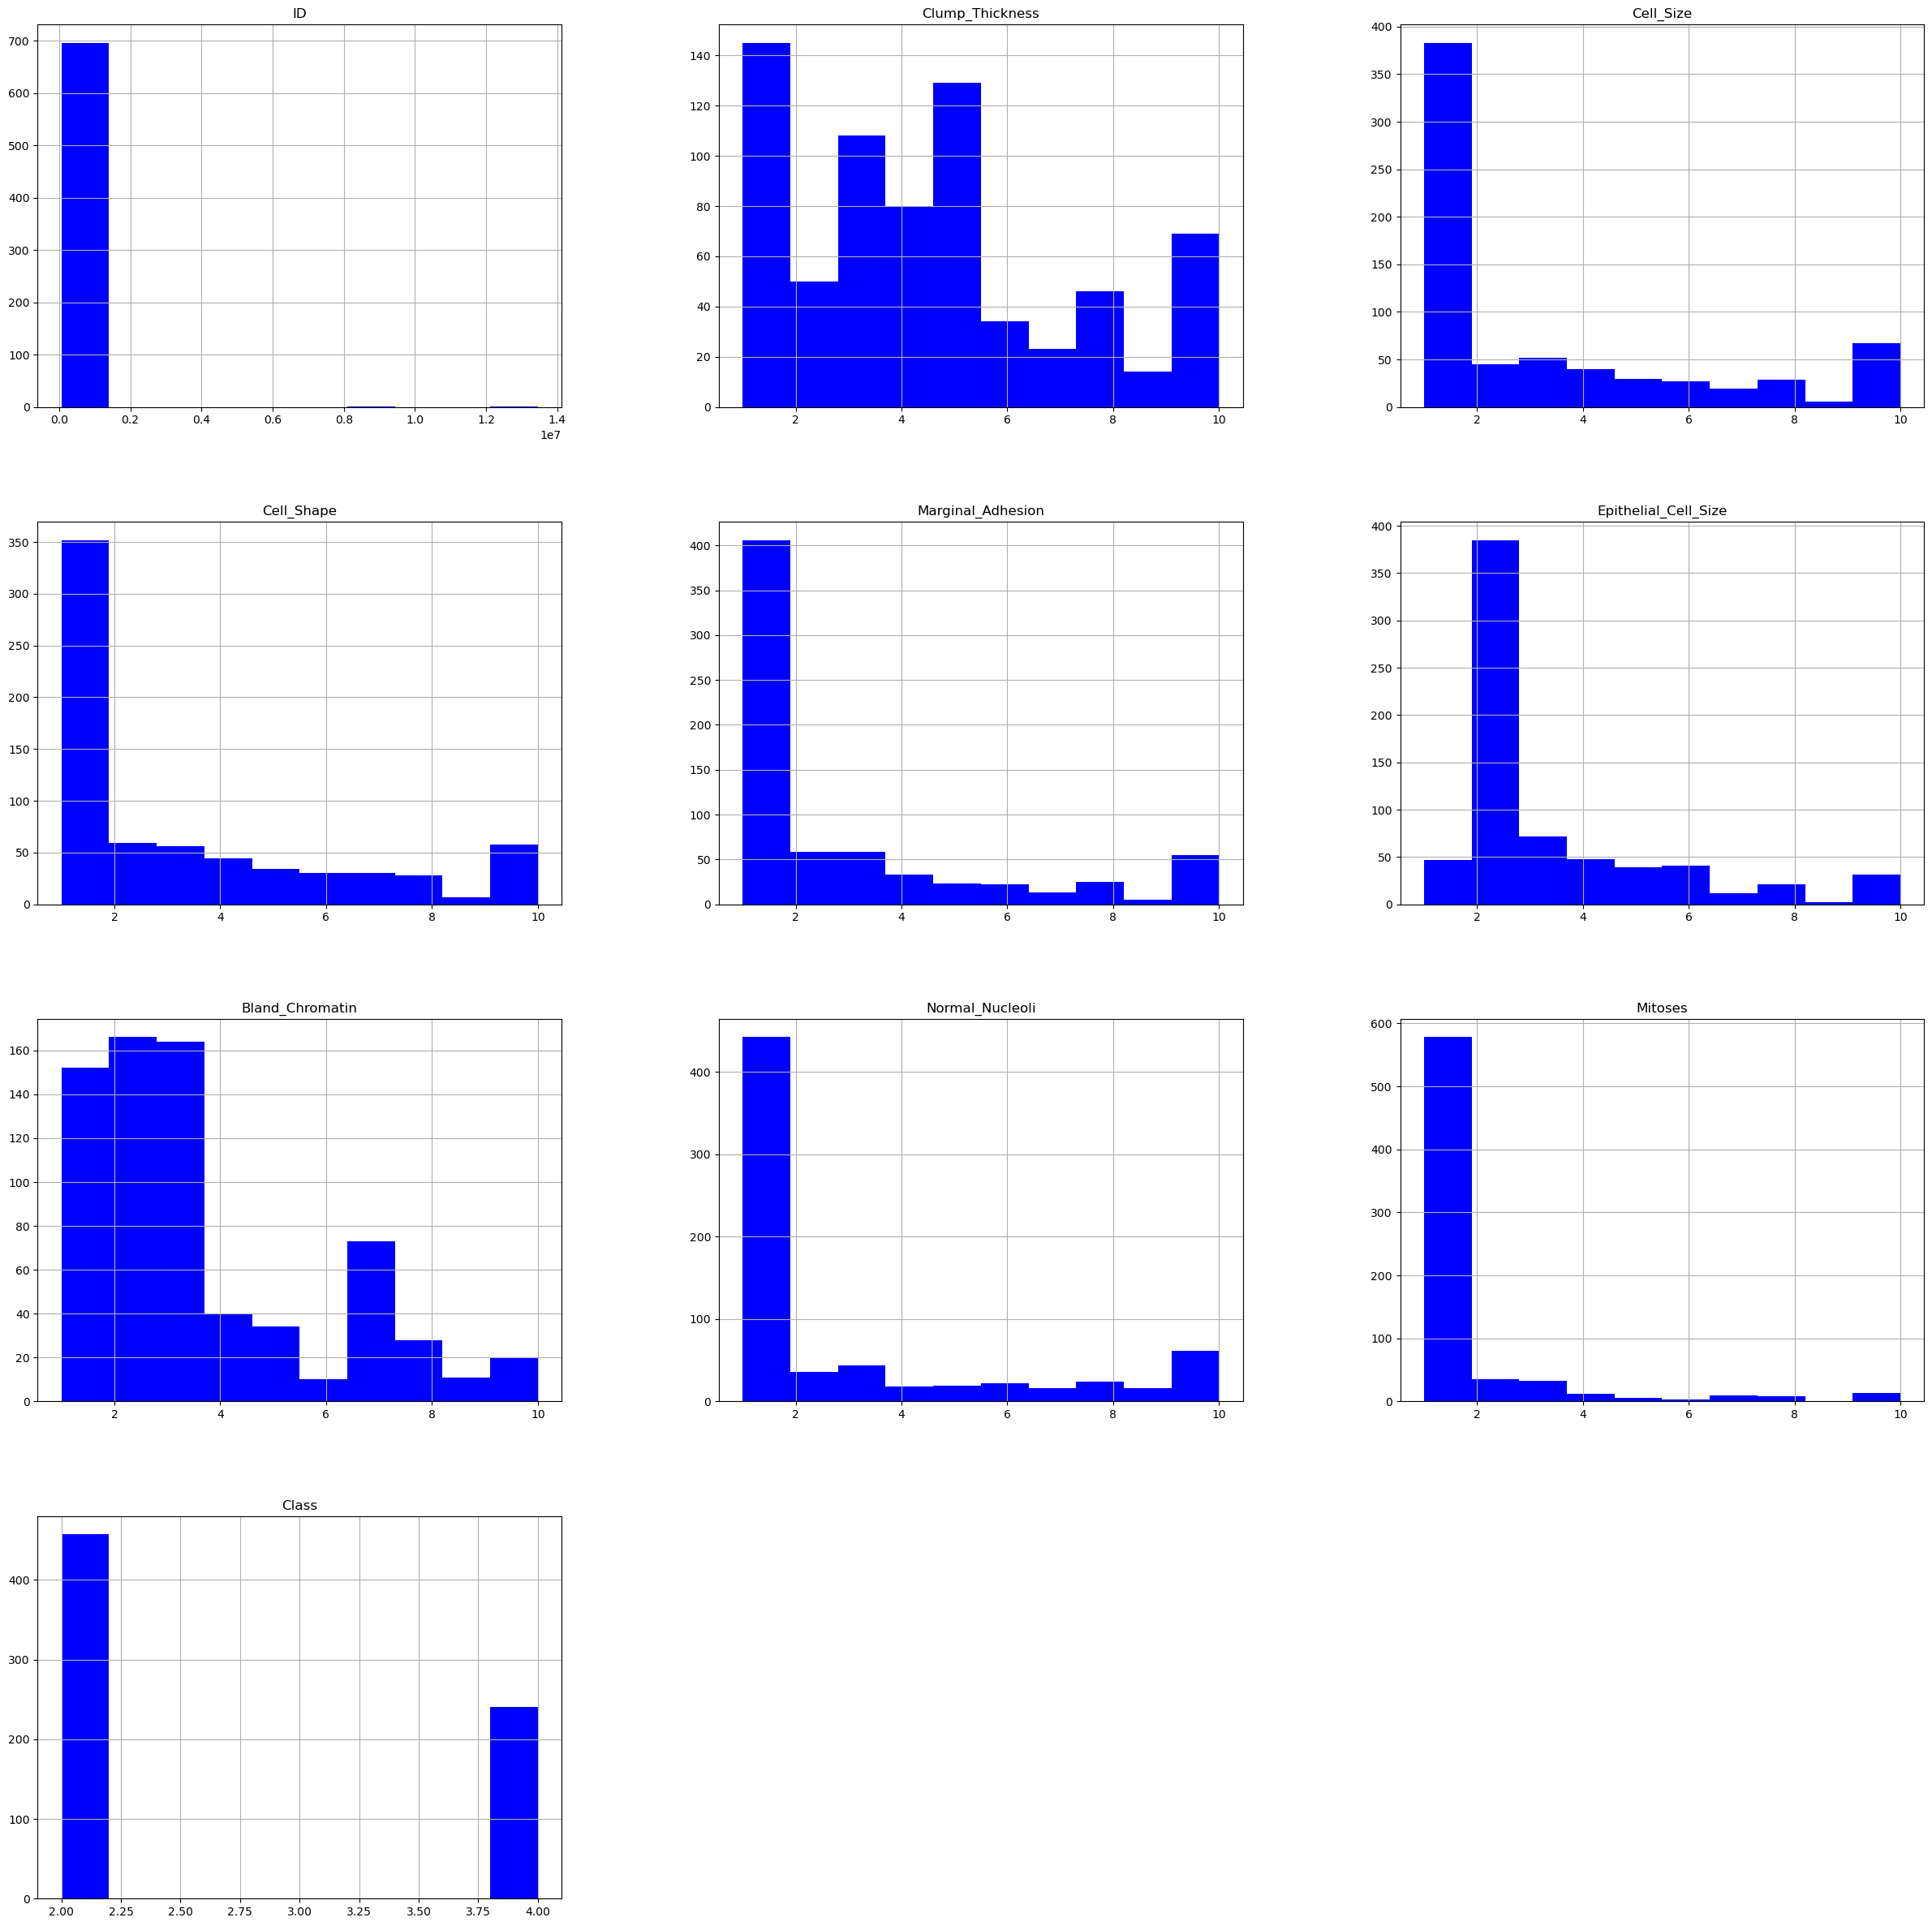

In [204]:
df.hist(figsize = (30,30), color = 'blue')
plt.show()

Text(0.5, 1.0, 'Class Plot (Benign = 2 , Malignant =4)')

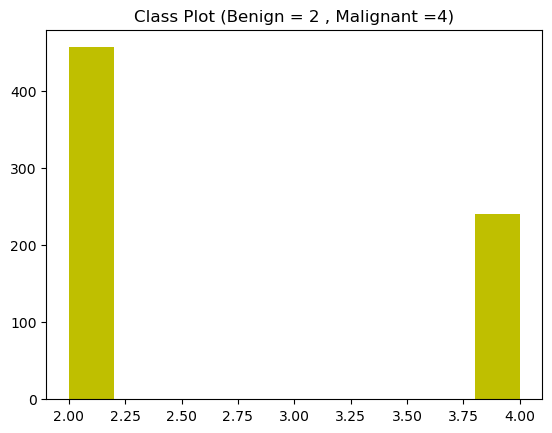

In [205]:
plt.hist(df['Class'],color='y')
plt.title('Class Plot (Benign = 2 , Malignant =4)')

In [206]:
df.drop('ID', axis=1, inplace=True)

In [207]:
df

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1,2
694,2,1,1,1,2,1,1,1,1,2
695,5,10,10,3,7,3,8,10,2,4
696,4,8,6,4,3,4,10,6,1,4


In [208]:
df.columns

Index(['Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion',
       'Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

# Feature Selection


In [209]:
input_df=df.drop(['Class'],axis=1)
Output_df=df['Class']


In [210]:
df

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1,2
694,2,1,1,1,2,1,1,1,1,2
695,5,10,10,3,7,3,8,10,2,4
696,4,8,6,4,3,4,10,6,1,4


# Train And Test Splitting

In [218]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(input_df,Output_df,test_size=0.3,random_state=42)

# Decision Tree

In [1]:

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)

NameError: name 'DecisionTreeClassifier' is not defined